In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Experimentación. Realizar experimentos sobre todas las instancias comparando el modelo propuesto respecto al de la solución actual de la compañía. En cada caso, medir la mejora porcentual obtenida. Sean $z_b$ y $z_g$ el valor de la función objetivo de una solución del modelo para el batching y el de FCFS, respectivamente. definimos la mejora relativa como

$$
    \%\text{gap}= \frac{z_g − z_b}{z_b}
$$

En caso de considerarlo conveniente, pueden agregar otras métricas complementarias (respecto al método o a las soluciones) para el análisis de los resultados.
Sugerencia: se recomienda sistematizar la realización de experimentos, idealmente definiendo
la lista de instancias a considerar y reportando en algún formato conveniente (por ejemplo, csv)
el resumen de los resultados obtenidos, para ser analizados posteriormente.

In [4]:
solutions = pd.read_csv('../output/results.csv')
solutions

,filename,n,greedy_cost,min_cost_flow_cost,greedy_time,min_cost_flow_time
0,input/small_0.csv,10,36.9,29.3,0.004125,1
1,input/small_1.csv,10,42.5,32.4,0.003541,0
2,input/small_2.csv,10,65.6,56.9,0.003583,0
3,input/small_3.csv,10,33.2,23.7,0.003834,0
4,input/small_4.csv,10,33.9,30.8,0.004083,0
5,input/small_5.csv,10,63.6,54.4,0.003667,0
6,input/small_6.csv,10,46.6,41.0,0.003625,0
7,input/small_7.csv,10,56.3,46.9,0.003208,0
8,input/small_8.csv,10,38.1,35.5,0.003417,0
9,input/small_9.csv,10,65.5,49.7,0.002708,0


In [5]:
solutions["gap"] = (solutions["greedy_cost"] - solutions["min_cost_flow_cost"]) / solutions["min_cost_flow_cost"]

In [6]:
solutions

,filename,n,greedy_cost,min_cost_flow_cost,greedy_time,min_cost_flow_time,gap
0,input/small_0.csv,10,36.9,29.3,0.004125,1,0.259386
1,input/small_1.csv,10,42.5,32.4,0.003541,0,0.311728
2,input/small_2.csv,10,65.6,56.9,0.003583,0,0.152900
3,input/small_3.csv,10,33.2,23.7,0.003834,0,0.400844
4,input/small_4.csv,10,33.9,30.8,0.004083,0,0.100649
5,input/small_5.csv,10,63.6,54.4,0.003667,0,0.169118
6,input/small_6.csv,10,46.6,41.0,0.003625,0,0.136585
7,input/small_7.csv,10,56.3,46.9,0.003208,0,0.200426
8,input/small_8.csv,10,38.1,35.5,0.003417,0,0.073239
9,input/small_9.csv,10,65.5,49.7,0.002708,0,0.317907


In [7]:
avg_gap = solutions["gap"].mean()
avg_gap

0.2436040627661849

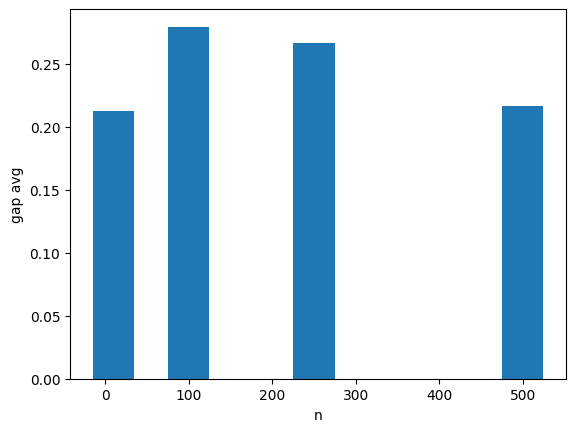

In [12]:
# Plot gap avg vs. n

avg_10  = solutions[solutions["n"] == 10]["gap"].mean()
avg_100 = solutions[solutions["n"] == 100]["gap"].mean()
avg_250 = solutions[solutions["n"] == 250]["gap"].mean()
avg_500 = solutions[solutions["n"] == 500]["gap"].mean()

# Plot gap avg vs. n
# Bar plot

ns = [10, 100, 250, 500]
avg_gaps = [avg_10, avg_100, avg_250, avg_500]

plt.bar(ns, avg_gaps, width=50)
plt.xlabel("n")
plt.ylabel("gap avg")

plt.show()

## Idea: Generar instancias de prueba

Para cada $ n \in [2, 500] $, generar 10 instancias de prueba.

Ejemplo de instancia small_0:

10

-73.95787684429749,40.80107832750914
-73.99859389615287,40.72681272648666
-73.97613791642482,40.734920152887305
-73.95696156483291,40.76563597097822
-73.95290293686591,40.777139494435374
-74.01242622944504,40.70335908207175
-73.98976945027903,40.74715127450688
-73.99151240293912,40.75101731701905
-73.9885286873513,40.76478427621614
-73.98161858061569,40.720222744955386
-74.00070510387474,40.73729460206807,1.0621644000000001,6.96
-73.97178352556233,40.760357828133294,4.1199104,16.0
-73.97953722550209,40.78052689849282,3.8624159999999996,13.3
-73.97738435035566,40.76507454063362,1.4162192,9.3
-73.97371788498211,40.78526104848797,3.379614,12.95
-73.94433486173024,40.77458478321152,1.9312079999999998,11.15
-73.98402752048139,40.755321924476995,3.781949,15.38
-73.97725567941671,40.761841698580156,3.2991469999999996,19.9
-73.96741890580599,40.749132879508416,1.2874720000000002,6.3
-73.9535389820928,40.7750968958531,1.1265379999999998,6.96
10.6,5.3,4.3,5.5,3.2,3.9,7.1,5.8,5.8,2.9
1.2,6.1,7.1,5.9,8.1,10.4,4.2,5.6,5.5,9.5
2.9,2.8,4.6,2.9,4.9,7.2,2.8,2.6,2.3,6.2
7.5,2.1,3.9,2.3,3.7,2.2,4.0,2.6,2.7,1.3
9.0,3.6,3.3,3.8,3.1,1.2,5.5,4.1,4.2,0.3
4.4,9.8,10.8,9.6,11.8,14.1,7.9,9.3,9.2,13.2
2.1,3.2,4.2,3.0,5.3,7.6,1.4,2.7,2.7,6.6
2.3,3.1,4.0,2.9,5.1,7.4,1.2,2.6,2.9,6.4
3.9,2.3,2.4,1.3,3.5,5.8,1.4,1.5,3.8,4.8
3.7,4.8,5.8,4.6,6.9,9.2,3.5,4.3,4.2,8.2

Una instancia de prueba es un csv de la forma:

En la primera línea, el número de taxis/pasajeros $n$.
Entre la fila 2 y $n+1$, las coordenadas de los taxis.
Entre la fila $n+2$ y $2n+1$, las coordenadas de los pasajeros, la distancia de su viaje, el costo del viaje.
Entre la fila $2n+2$ y $3n+1$, la matriz de distancias entre taxis y pasajeros.

Generar una instancia de prueba es generar un csv de la forma anterior.

Ejemplo para $n=10$:

In [17]:
from random import random

In [20]:
"""
Para cada $ n \in [2, 500] $, generar 10 instancias de prueba.

Ejemplo de instancia small_0:

Una instancia de prueba es un csv de la forma:

En la primera línea, el número de taxis/pasajeros $n$.
Entre la fila 2 y $n+1$, las coordenadas de los taxis.
Entre la fila $n+2$ y $2n+1$, las coordenadas de los pasajeros, la distancia de su viaje, el costo del viaje.
Entre la fila $2n+2$ y $3n+1$, la matriz de distancias entre taxis y pasajeros.
"""

# Ejemplo para n = 10

from typing import List, Tuple

n = 10

# taxis
taxis : List[Tuple[int]]= [(random() * 100, random() * 100) for _ in range(n)]

# pasajeros
pasajeros : List[Tuple[int]] = [(random() * 100, random() * 100, random() * 100, random() * 100) for _ in range(n)]

# matriz de distancias
# Formula para calcular la distancia entre dos puntos (x1, y1) y (x2, y2):
# sqrt((x1 - x2)^2 + (y1 - y2)^2)

distancias : List[List[float]] = []

for i in range(n):
    distancias.append([])
    for j in range(n):
        distancias[i].append(((taxis[i][0] - pasajeros[j][0]) ** 2 + (taxis[i][1] - pasajeros[j][1]) ** 2) ** 0.5)

# display(n)
# display(taxis)
# display(pasajeros)
# display(distancias)

# Guardar en ../input/fake_instances/small_test.csv

with open('../input/fake_instances/small_test.csv', 'w') as f:
    f.write(str(n) + '\n')
    for i in range(n):
        f.write(str(taxis[i][0]) + ',' + str(taxis[i][1]) + '\n')
    for i in range(n):
        f.write(str(pasajeros[i][0]) + ',' + str(pasajeros[i][1]) + ',' + str(pasajeros[i][2]) + ',' + str(pasajeros[i][3]) + '\n')
    for i in range(n):
        for j in range(n):
            f.write(str(distancias[i][j]) + ',')
        f.write('\n')

def generate_instance(n: int):
    # taxis
    taxis : List[Tuple[int]]= [(random() * 100, random() * 100) for _ in range(n)]

    # pasajeros
    pasajeros : List[Tuple[int]] = [(random() * 100, random() * 100, random() * 100, random() * 100) for _ in range(n)]

    # matriz de distancias
    # Formula para calcular la distancia entre dos puntos (x1, y1) y (x2, y2):
    # sqrt((x1 - x2)^2 + (y1 - y2)^2)

    distancias : List[List[float]] = []

    for i in range(n):
        distancias.append([])
        for j in range(n):
            distancias[i].append(((taxis[i][0] - pasajeros[j][0]) ** 2 + (taxis[i][1] - pasajeros[j][1]) ** 2) ** 0.5)
    
    return taxis, pasajeros, distancias

def write_csv(n, taxis, pasajeros, distancias):
    with open('../input/fake_instances/fake_' + str(n) + '.csv', 'w') as f:
        f.write(str(n) + '\n')
        for i in range(n):
            f.write(str(taxis[i][0]) + ',' + str(taxis[i][1]) + '\n')
        for i in range(n):
            f.write(str(pasajeros[i][0]) + ',' + str(pasajeros[i][1]) + ',' + str(pasajeros[i][2]) + ',' + str(pasajeros[i][3]) + '\n')
        for i in range(n):
            for j in range(n):
                f.write(str(distancias[i][j]) + ',')
            f.write('\n')

# Generar 10 instancias de prueba para cada n en [2, 500]

for n in range(2, 501):
    for i in range(1):
        taxis, pasajeros, distancias = generate_instance(n)
        write_csv(n, taxis, pasajeros, distancias)
